## Name : Sapna Singh

### Task 5: EDA on IPL

Aim : To find out the most successful teams, players and factors
contributing win or loss of a team.

### Step 1: Import important libraries  and load the data set

In [1]:
import numpy as np # mathematical fun
import pandas as pd # manipulating data 
import matplotlib.pyplot as plt # data visualizayion
import seaborn as sns # data Visulaization 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv(r"matches.csv")
deliveries = pd.read_csv(r"deliveries.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape

(756, 18)

There are 756 rows and 18 columns in matches data 


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
deliveries.shape

(179078, 21)

There are 179078 rows and 21 columns in Deliveries dataset


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
missingrows_precentage= pd.DataFrame(matches.isnull().sum()/matches.isnull().shape[0],columns=["misssing_percentage"])

In [11]:
missingrows_precentage.round(2)

,misssing_percentage
id,0.00
season,0.00
city,0.01
date,0.00
team1,0.00
team2,0.00
toss_winner,0.00
toss_decision,0.00
result,0.00
dl_applied,0.00


In [12]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


###  Which Team has won by Maximum Runs 

In [13]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### Which team has won by minimum margin of runs 

In [14]:
matches.iloc[matches['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

### Which team has won by Maximum wickets

In [15]:
matches.iloc[matches['win_by_wickets'].idxmax()]


id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

## Which team has won by minimum wickets 

In [16]:
matches.iloc[matches['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

## Univariate Analysis

### i.Season

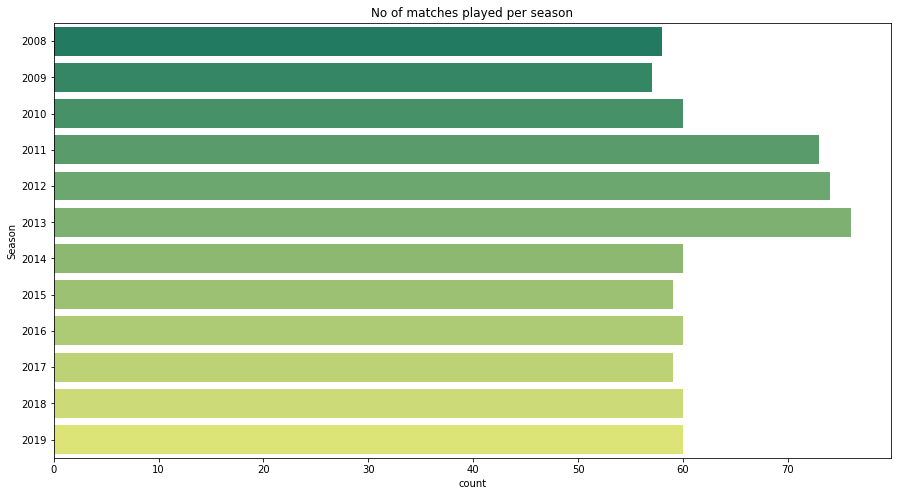

In [17]:
## No of macthes playes per season 
plt.figure(figsize=(15,8))
sns.countplot(y=matches["season"] , palette = "summer")
plt.title ("No of matches played per season")
plt.ylabel("Season")
plt.show()

#### Maximum matches are  played  in Season 11,12 and 13 

### ii.Winner

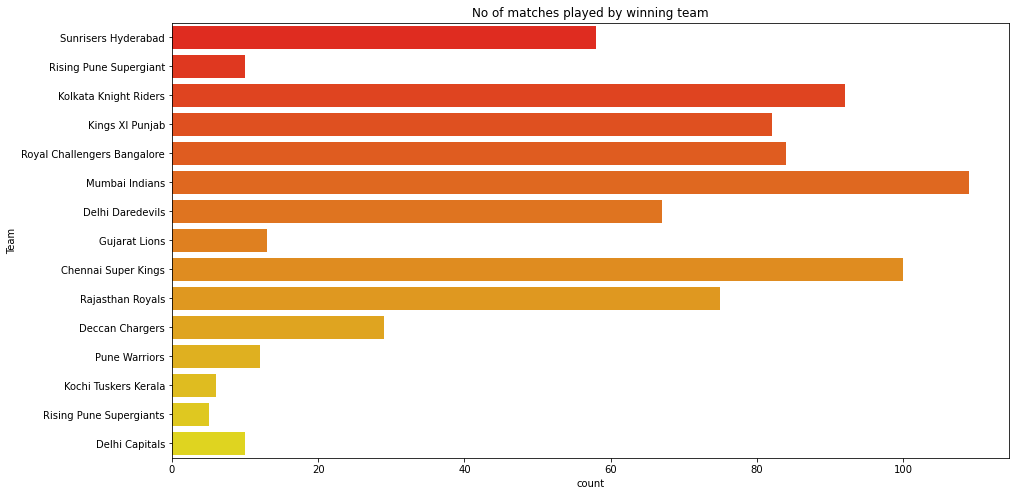

In [18]:
## No of matches played by winning team 
plt.figure(figsize=(15,8))
sns.countplot(y=matches["winner"] , palette = "autumn")
plt.title ("No of matches played by winning team")
plt.ylabel("Team")
plt.show()

#### Mumbai Indians , Chennai Super Kings , Royal Challengers Banglore , Kolkata Knight Ridesr have played maximum no of matches 

### iii.City

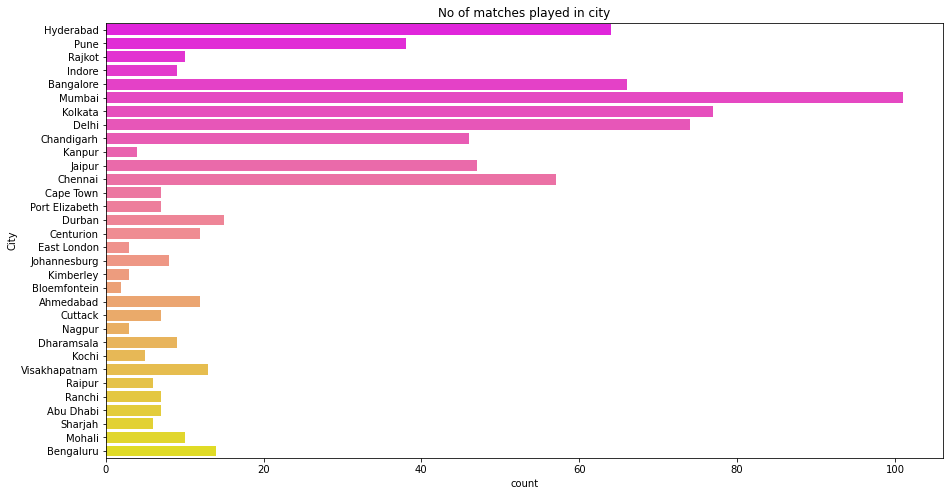

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(y=matches["city"] , palette = "spring")
plt.title ("No of matches played in city")
plt.ylabel("City")
plt.show()

### Maximum macthes are  played in Mumbai ,Kolkata , Chandigarh and Bangalore

### iv.Venue

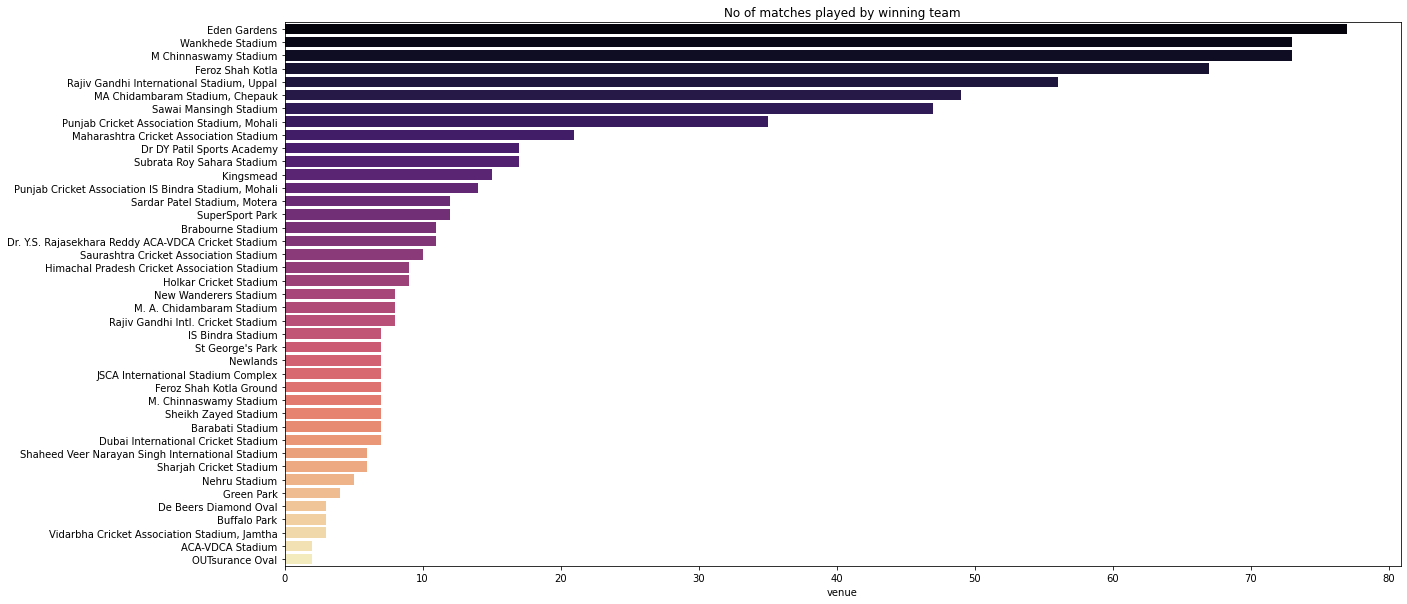

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(y=matches["venue"].value_counts().index,x=matches["venue"].value_counts() , palette = "magma")
plt.title ("No of matches played by winning team")
#plt.ylabel("Venue")
plt.show()

#### Stadiums : Rajive Gandhi International Stadium,Eden GArdens ,Wankede , M Chinnaswamy these are the stadiums where maximum no of matches are played   

### v.player_of_match

In [21]:
player_of_match= matches["player_of_match"].value_counts()[:10]

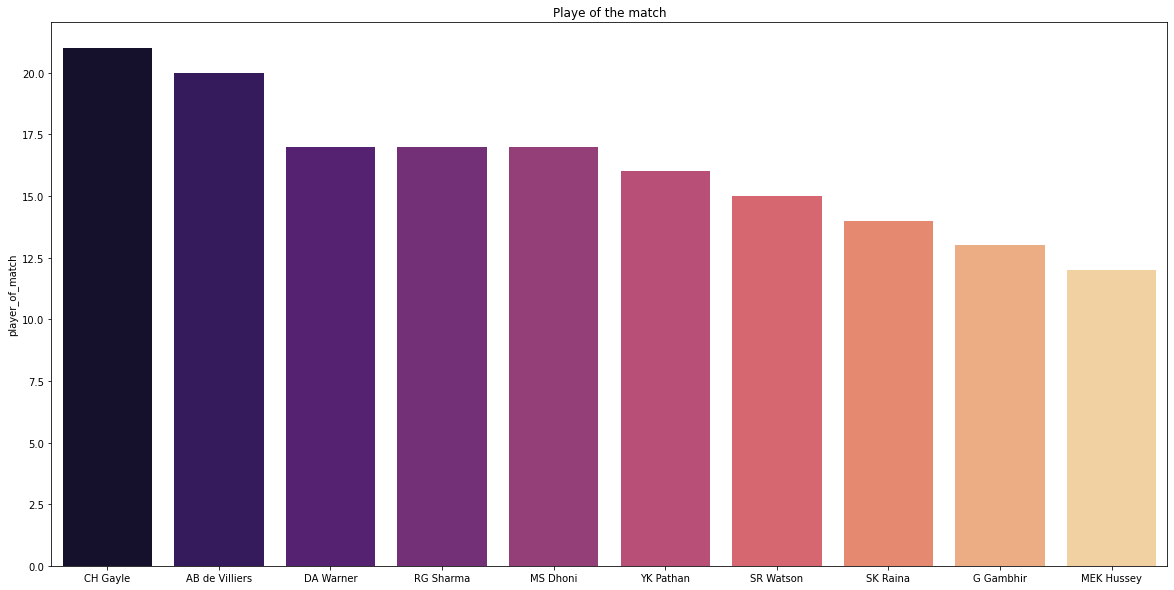

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=player_of_match.index , y=player_of_match, palette = "magma")
plt.title ("Playe of the match")
#plt.ylabel("Venue")
plt.show()

### Toss won and match won 

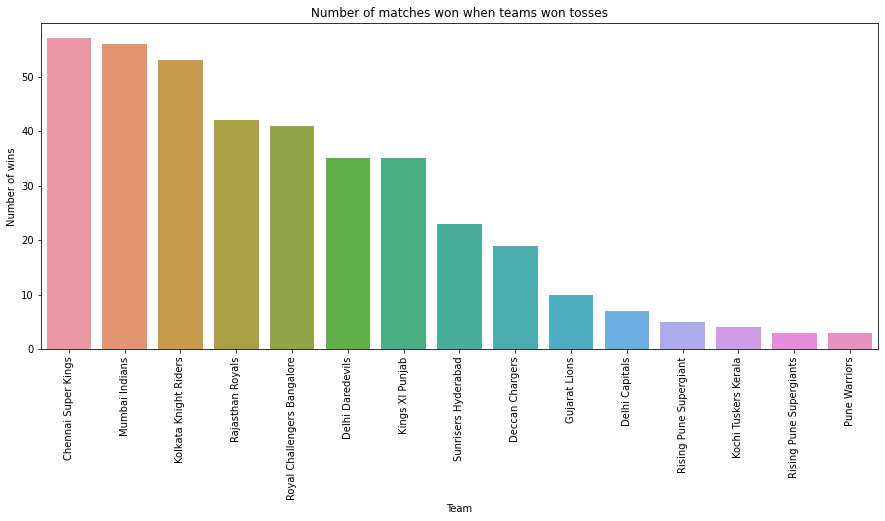

In [23]:
plt.figure(figsize=(15,6))
toss_winner_winner =( matches[matches['toss_winner'] == matches['winner']])
#only those teams who won the toss and match as well
team_toss = toss_winner_winner['winner'].value_counts()
sns.barplot(x=team_toss.index,y=team_toss) # on y axis i want Teams name as Index
plt.title("Number of matches won when teams won tosses"),
plt.xlabel('Team')
plt.ylabel('Number of wins')
plt.xticks(rotation=90)
plt.show()

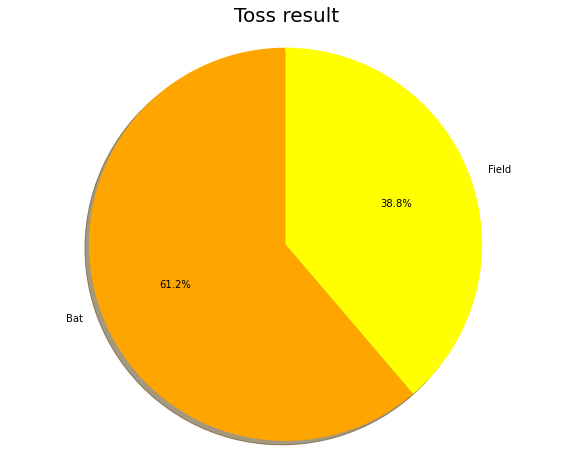

In [24]:
# we will plot pie chart on Toss decision
Toss = matches.toss_decision.value_counts()
labels =["Bat","Field"]
sizes = Toss.values

colors = ['orange', 'yellow']
plt.figure(figsize = (10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result', fontsize=20)
plt.axis('equal')
plt.show()

In [25]:

# we will print winner season wise

season_winner = matches.drop_duplicates(subset=['season'], keep='last')

season_winner[['season','toss_winner','toss_decision','winner','player_of_match']].reset_index(drop=True).sort_values('season')

,season,toss_winner,toss_decision,winner,player_of_match
1,2008,Rajasthan Royals,field,Rajasthan Royals,YK Pathan
2,2009,Royal Challengers Bangalore,field,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,bat,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,bat,Chennai Super Kings,M Vijay
5,2012,Chennai Super Kings,bat,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,bat,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,field,Kolkata Knight Riders,MK Pandey
8,2015,Chennai Super Kings,field,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,BCJ Cutting
0,2017,Mumbai Indians,bat,Mumbai Indians,KH Pandya


In [26]:
print("Total matches where team won toss and match as well :",sum(matches['toss_winner'] == matches['winner']) )


Total matches where team won toss and match as well : 393


In [27]:
print("Total matches where team won toss but didn't win match :",sum(matches['toss_winner'] != matches['winner']))


Total matches where team won toss but didn't win match : 363


In [28]:
print("Percentage of Matches won after winning the Toss: ",round(np.mean(matches['toss_winner'] == matches['winner'])*100,2))

print("Percentage of Matches won after losing the Toss: ",round(np.mean(matches['toss_winner'] != matches['winner'])*100,2))

Percentage of Matches won after winning the Toss:  51.98
Percentage of Matches won after losing the Toss:  48.02


 Toss doesn't impact on macthes as such

## Let's look into deliveries data set

In [29]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [30]:
deliveries.shape

(179078, 21)

In [31]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#### spread of data 

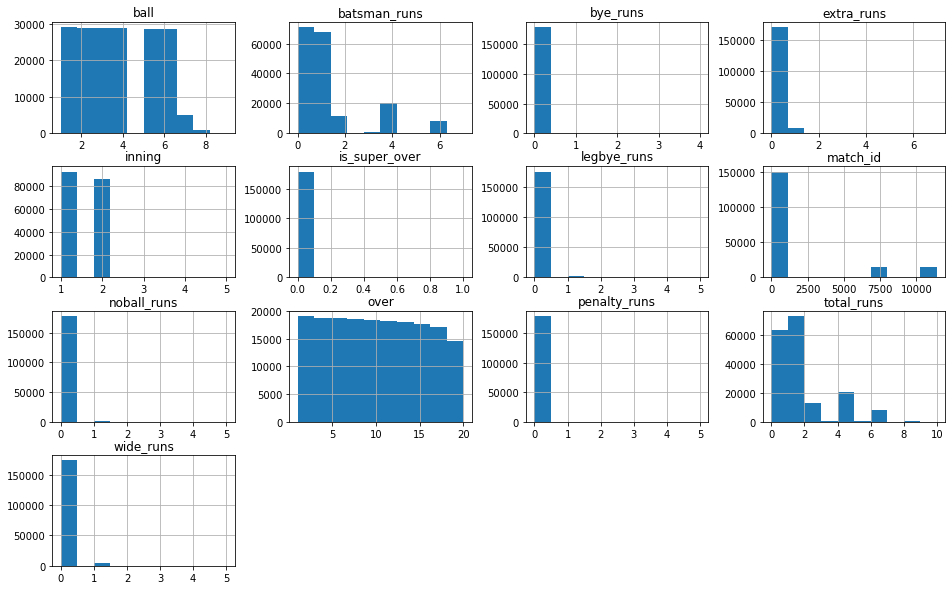

In [32]:
deliveries.hist(figsize=(16,10))
plt.show()

#### Missing values treatment

In [33]:
deliveries['player_dismissed']=deliveries['player_dismissed'].fillna(0)
deliveries['dismissal_kind']=deliveries['dismissal_kind'].fillna(0)
deliveries['fielder']=deliveries['fielder'].fillna(0)
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


In [34]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

### Total wickets taken

In [35]:
wickets = deliveries[deliveries['player_dismissed']!=0]
print("Total wickets taken : ", wickets.shape[0])


Total wickets taken :  8834


### Types of dismissals

Text(0.5, 1.0, 'Types of dismissal')

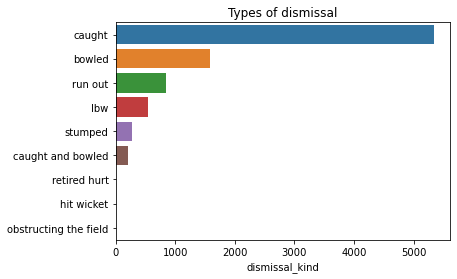

In [36]:
sns.barplot(y=wickets["dismissal_kind"].value_counts().index,x=wickets["dismissal_kind"].value_counts())
plt.title("Types of dismissal")


### Team which has taken highest number of wickets

In [37]:
wickets["bowling_team"].value_counts()

Mumbai Indians                 1138
Royal Challengers Bangalore    1036
Chennai Super Kings            1030
Kolkata Knight Riders          1010
Kings XI Punjab                 994
Delhi Daredevils                912
Rajasthan Royals                856
Sunrisers Hyderabad             652
Deccan Chargers                 446
Pune Warriors                   238
Gujarat Lions                   151
Rising Pune Supergiant          113
Delhi Capitals                  108
Rising Pune Supergiants          76
Kochi Tuskers Kerala             74
Name: bowling_team, dtype: int64

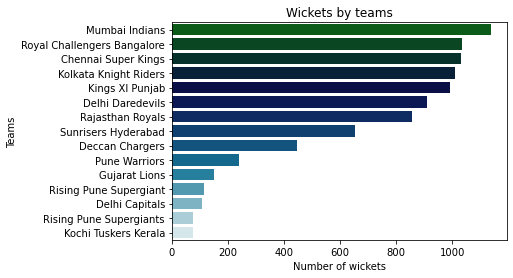

In [38]:
fig=(15,7)
team_wickets = wickets['bowling_team'].value_counts()
sns.barplot(y=team_wickets.index,x=team_wickets , palette='ocean')
plt.title('Wickets by teams')
plt.ylabel('Teams') 
plt.xlabel('Number of wickets')
plt.show()

#### MI has taken maximum no of wickets followed by RCB,CSK, KKR  ,KXIP

### Bowler who has taken maximum no of wickets in IPL

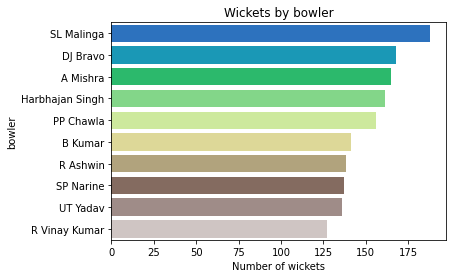

In [39]:
bowler_wickets = wickets['bowler'].value_counts()
top_bowlers = bowler_wickets[:10]
sns.barplot(y=top_bowlers.index,x=top_bowlers,palette="terrain")
plt.title('Wickets by bowler')
plt.ylabel('bowler') 
plt.xlabel('Number of wickets')
plt.show()

#### Malinga , bravo ,A mishra have taken maximum wickets

### Total Boundaries hit  by team 

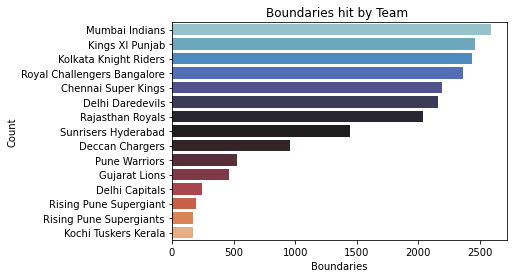

In [40]:
fours = deliveries[deliveries['batsman_runs']==4]
team_fours = fours['batting_team'].value_counts()
sns.barplot(y=team_fours.index,x=team_fours,palette="icefire")
plt.title('Boundaries hit by Team ')
plt.ylabel('Count') 
plt.xlabel('Boundaries')
plt.show()

### Six hit teams

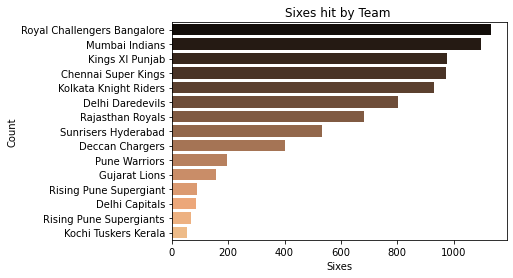

In [41]:
six = deliveries[deliveries['batsman_runs']==6]
team_sixes = six['batting_team'].value_counts()
sns.barplot(y=team_sixes.index,x=team_sixes,palette="copper")
plt.title('Sixes hit by Team ')
plt.ylabel('Count') 
plt.xlabel('Sixes')
plt.show()

#### MI,RCB have hit maximum no of boundaries and sixes 

### Batsman scored maximum sixes

Text(0.5, 1.0, 'Batsman hitting maximnum six')

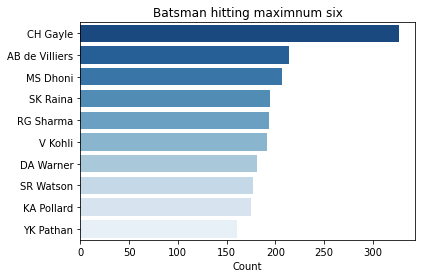

In [42]:
batsman_sixes = six['batsman'].value_counts()
top_batsman_6 = six['batsman'].value_counts()[:10]
sns.barplot(y=top_batsman_6.index,x=top_batsman_6, palette="Blues_r")
plt.xlabel("Count")
plt.title("Batsman hitting maximnum six")

#### Chris Gayle have sored maximum no of six

### Btaman hit maximum no of boundaries

Text(0.5, 1.0, 'Batsman hitting maximnum boundaries')

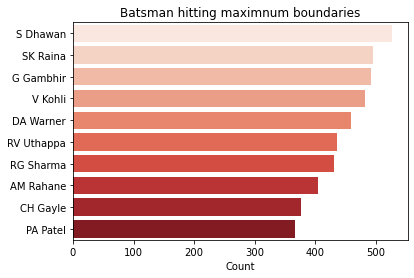

In [43]:
batsman_fours = fours['batsman'].value_counts()
top_batsman_4 = fours['batsman'].value_counts()[:10]
sns.barplot(y=top_batsman_4.index,x=top_batsman_4,palette="Reds")
plt.xlabel("Count")
plt.title("Batsman hitting maximnum boundaries")

#### Shikar Shwana, Raina , GAmbir , Kohli have hit maximum boundaries

### Wicket Keeper with maximum Stumping 

In [44]:
# Take the dismissal kind as stumped and count the number of stumping a fielder(wicket-keeper) has done
wicket_keeper_stumping = deliveries[deliveries['dismissal_kind']=='stumped']['fielder'].value_counts().reset_index()

In [45]:
# Renaming the column accordingly
wicket_keeper_stumping.rename(columns={'index':'wicket_keeper','fielder':'stumping'}, inplace=True)

In [46]:
wicket_keeper_stumping.head()

,wicket_keeper,stumping
0,MS Dhoni,38
1,RV Uthappa,32
2,KD Karthik,29
3,WP Saha,18
4,PA Patel,16


## Total Runs scored by Batsman

In [47]:
batsman_runs = deliveries.groupby(['batsman']).agg({'batsman_runs':'sum'})
batsman_runs.sort_values(by=['batsman_runs'],ascending=False)[:20]

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


### Centuries scored by players

In [51]:
century_data = deliveries.groupby(['match_id','batsman']).sum()['batsman_runs']
## Grouping batsman wrt match id

In [52]:
century_data = century_data[century_data>=100].reset_index().groupby(['batsman']).count().sort_values(by = 'batsman_runs',ascending = False)
## grouping by batsman scored more tha nor qual to 100 ,counting it sorting it in descending order

In [54]:
century_data.drop('match_id',axis = 1).rename({'batsman_runs':'No. of centuries'},axis = 1)[:13]
## dropping match id , renaming batsman run to no of centuries 

,No. of centuries
batsman,
CH Gayle,7
V Kohli,5
DA Warner,4
SR Watson,4
AB de Villiers,3
HM Amla,2
AC Gilchrist,2
AM Rahane,2
V Sehwag,2


## Analysis



* 76 matches has been played in the year 2013 which is the maximum in any of the seasons
* Mumbai city has hosted the maximum number of matches
* Eden Garden Stadium hosted the maximum number of matches
* 15 teams has been played so far in all the seasons of the IPL
* Total 756 matches has been played in 12 seasons of IPL
* Mumbai Indians holds the record for winning the toss i.e 98 times
* CH Gayle is the most valuable player with 21 man of the match awards
* Chennai Super Kings has the record for winning both toss and matches 
* Mumbai Indians is the most successful team for winning 109 matches
* Mumbai Indians have taken 1138 wickets
* SL Malinga is the most successful bowler with 188 wickets
* S Dhawan holds the record for hitting maximum number of fours
* Royal Challangers Bangalore holds the record for hitting maximum number of sixes i.e, 1132
* Mumbai Indian holds the record for hitting 2588 fours
* Mumbai Indian have scored 28164 runs through bat more than any team
* 327 sixes CH Gayle holds the record for hitting maximum number of sixes
* With 5434 runs V Kohili is the most successful batsman
* MS Dhoni took maximum wickets by stumoping
* Chris Gayle has scored century 7 times

### Conclusion
According to analysis Mumbai Indians or Chennai Super Kings  and V Kohilior or Chris Gayle can be choosen by company to endorse their products